In [1]:
from framework_chatgpt import FrameWork
from survival_probablity import PseudoDirac
#from framework import BorexinoRecoilSpectrum
#from framework import SuperkPrediction

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from cobaya.run import run

from getdist.mcsamples import MCSamplesFromCobaya
from getdist import plots, MCSamples

plt.rcParams['text.usetex']=True
plt.style.use('classic')


In [2]:
global frame, error, data

frame = FrameWork()
error = frame.data[:,2]
data  = frame.data[:,1]

In [3]:
prediction = frame[34,0,7.54e-5]

In [4]:
print(frame.data[:,3])

[-0.0005 -0.0005 -0.0005 -0.0005 -0.0005 -0.0005 -0.0005 -0.0005 -0.0005
 -0.0005 -0.0005 -0.001  -0.0005 -0.001  -0.0005 -0.0005 -0.001  -0.0005
 -0.001  -0.001  -0.0005 -0.001  -0.0005 -0.0005 -0.0005 -0.0005 -0.0005
 -0.0005 -0.0005]


In [5]:
print(prediction)

[2.40111369 2.39616039 2.39122748 2.38631484 2.38142234 2.37654987
 2.37169729 2.36686449 2.36205134 2.35725773 2.35248354 2.34654293
 2.33592508 2.32773296 2.32191654 2.31728429 2.3115199  2.30578412
 2.30007673 2.29326505 2.2876194  2.28200147 2.27641107 2.27195843
 2.26752318 2.26310521 2.25870442 2.25432072 2.24995399]


In [7]:
def LogLikelihood(t12,mum2,m12,delta):
    prediction = frame[t12,mum2,m12]
    return -0.5*(np.sum(np.log10(2*np.pi*error**2) + ((1+delta)*prediction-data)**2/error**2))



info = {"likelihood": {"Chi2": LogLikelihood},
        
        "params": dict([("t12"  , {"prior" : {"min": 20, "max": 40},
                                  "latex" : r"\theta_{12}"  }),
                        
                        ("mum2" , 0),
            
                        ("m12"  , {"prior" : {"dist": "norm", "loc": 7.54e-5, "scale" : 0.5e-5},
                                  "latex": r"\Delta M^2_{12}"  }),  
                        
                        ("delta", {"prior" : {"dist": "norm", "loc": 0, "scale" : 0.04},
                                  "latex": r"\delta"  })  
                        
                        
                        ]),
        
        "sampler": {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 100000}}
       }



In [8]:
updated_info,sampler = run(info)

[chi2] Initialized external likelihood.
[prior] *WARNING* There are unbounded parameters (['m12', 'delta']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {Chi2: 3.37}
[mcmc] Initial point: t12:29.66734, m12:6.712857e-05, delta:-0.02411669
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2024-08-14 01:36:37 : 1 steps taken, and 0 accepted.


KeyboardInterrupt: 

In [8]:
# Filled 2D comparison plot with legend
gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])

gdplot = gdplt.get_subplot_plotter(width_inch=7)

gdplot.settings.scaling = False
gdplot.triangle_plot(gd_sample, ["t12","m12","delta"], filled=True, 
                     param_limits={'t12': (20, 40), 
                                   'm12': (5e-5, 9e-5),
                                   'delta': (-1, 1)
                                  },lw=2)

#gdplot.export('./bayes_1_nopriors.pdf')

NameError: name 'updated_info' is not defined

<ErrorbarContainer object of 3 artists>

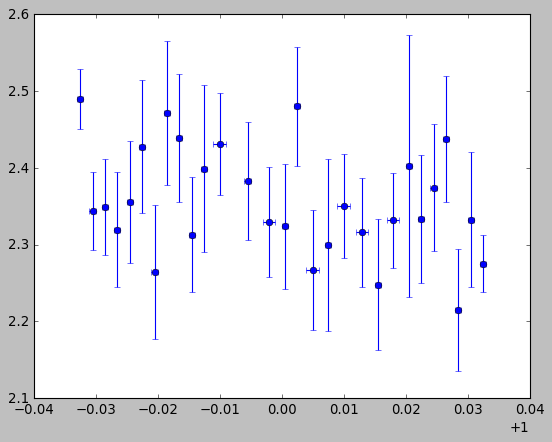

In [54]:
plt.errorbar(np.sqrt(d_obs),data,error,frame.data[3],fmt='o')

In [55]:
print(data_new.shape)

(4, 29)


In [ ]:
# #plt.plot(frame.day,total_event,'.')
# print(frame.borom_unoscilated_total)
# plt.plot(np.mod(frame.data[:,0],365.25)/365.25,frame.data[:,3],'.')

In [6]:
flux,dist,day = SuperkPrediction(frame.data,frame.total_days,total_event,frame.distance,frame.day)

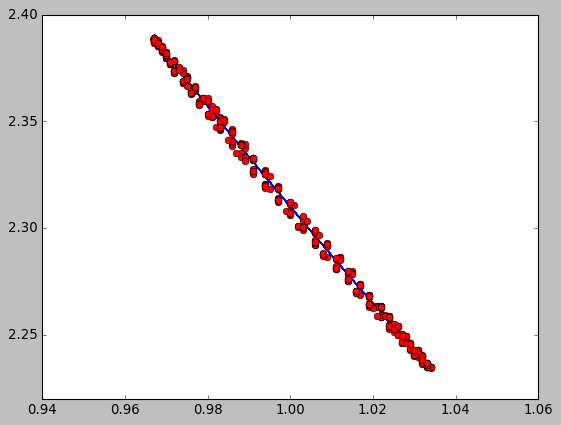

In [7]:
plt.xlim(0.94,1.06)
plt.plot(frame.distance**2,0.44*total_event,'b-')
#plt.plot(frame.data[:,6],frame.data[:,3],'g.')
plt.plot(frame.data[:,6],0.44*flux,'ro')


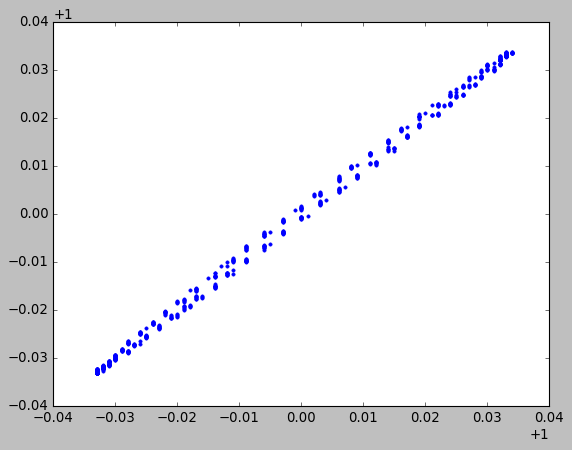

In [8]:
#plt.xlim(0,500)
#plt.plot(np.arange(0,frame.total_days,1),frame.distance**2)
#plt.plot(frame.data[:,0],frame.data[:,6],'g.')
#plt.plot(frame.data[:,0],dpredict**2,'r.')

plt.plot(frame.data[:,6],dist**2,'.')

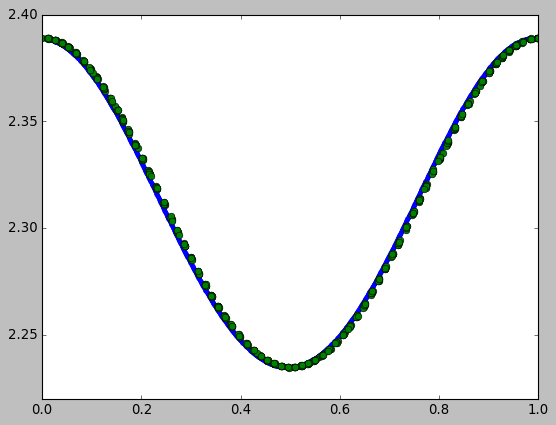

In [9]:
plt.plot(frame.day,0.44*total_event,'b.')
#plt.plot(lpredict,frame.data[:,3],'.')
plt.plot(day,0.44*flux,'go')

In [11]:
print(frame.data[(lpredict>1)&(lpredict<2)&(0.44*bin_predict>2.3),:])

[[5.53154815e+02 2.42537037e+00 2.48776620e+00 2.37000000e+00
  2.60000000e-01 2.80000000e-01 9.94000000e-01 2.35600000e+00
  2.63000000e-01 2.81000000e-01]
 [9.18720139e+02 2.49046296e+00 2.49025463e+00 2.29000000e+00
  3.20000000e-01 3.00000000e-01 9.94000000e-01 2.27700000e+00
  3.20000000e-01 2.96000000e-01]
 [2.38007956e+03 2.49901620e+00 2.49943287e+00 2.20000000e+00
  3.30000000e-01 3.00000000e-01 9.94000000e-01 2.19100000e+00
  3.26000000e-01 3.02000000e-01]]


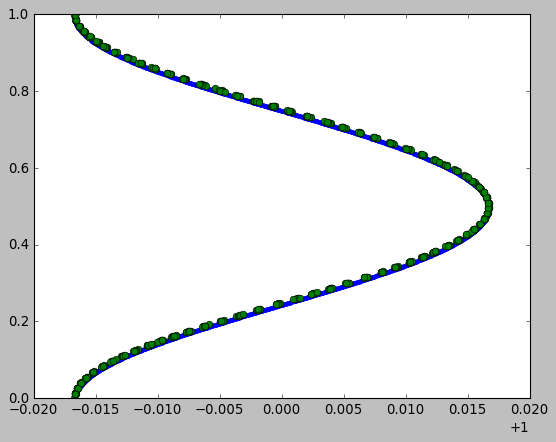

In [15]:
plt.plot(frame.distance,frame.day,'.')
plt.plot(dist,day,'o')